# Initial value problem for ODEs

# I. Euler's method for a first order ODE

Consider a first order equation

$$
\frac{d u}{d t} = \lambda u
$$

with the initial condition $u(t=0) = u_0$.

Here is a simple illustration of solving this equation with the explicit Euler method.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [5]:
def euler_solve(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

<IPython.core.display.Javascript object>


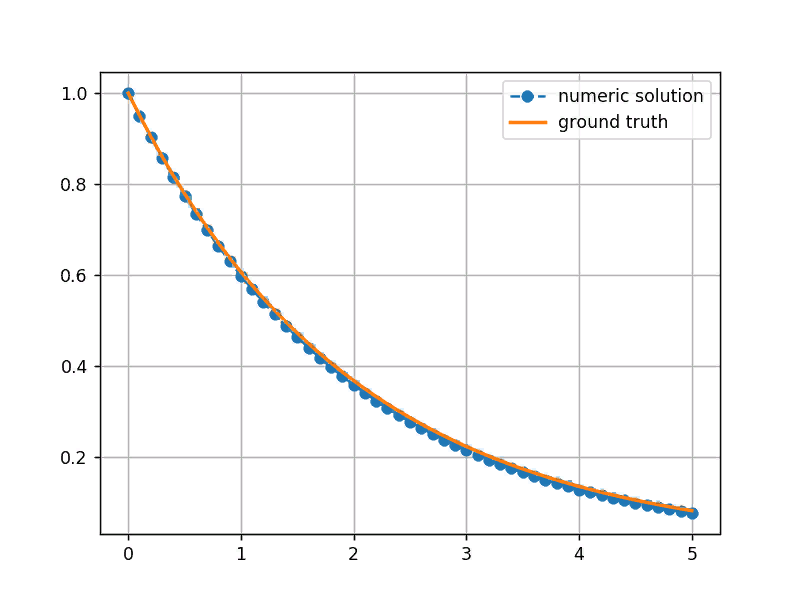

In [6]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Test I.1

Test the function above for varying step size $\tau$ (in the code it's `dt`), including $|\lambda| \tau > 1$? 

(10% of the grade)

<IPython.core.display.Javascript object>


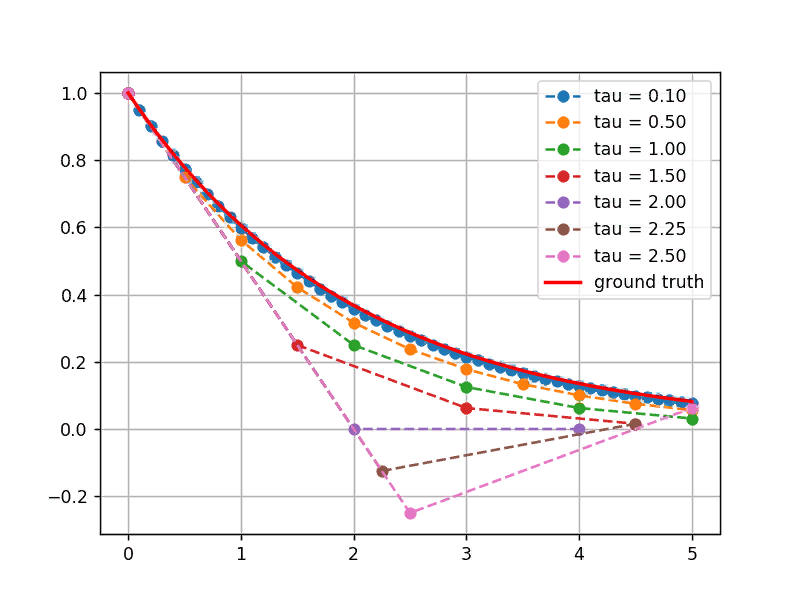

In [7]:
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='tau = 0.10')

for tau in [0.5, 1.0, 1.5, 2.0, 2.25, 2.5]:
    tt1, y1 = euler_solve(lam, u0=1.0, T=5, dt=tau)
    plt.plot(tt1, y1, 'o--', label='tau = %1.2f'%tau)
    
plt.plot(tt, np.exp(lam*tt), 'r-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

При $\tau = 2$ решение перестает быть монотонным, значит, при $\tau \geqslant 2$ явная схема неустойчива.

### Test I.2

Implement a function for solving the same equation, $du/dt = \lambda u$ using the implicit Euler scheme. Compare the behavior of the implicit and explicit Euler schemes. Discuss.

(10% of the grade)

In [8]:
def imp_euler_solve(lam, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k]/(1 - dt*lam)
    return tt, y

<IPython.core.display.Javascript object>


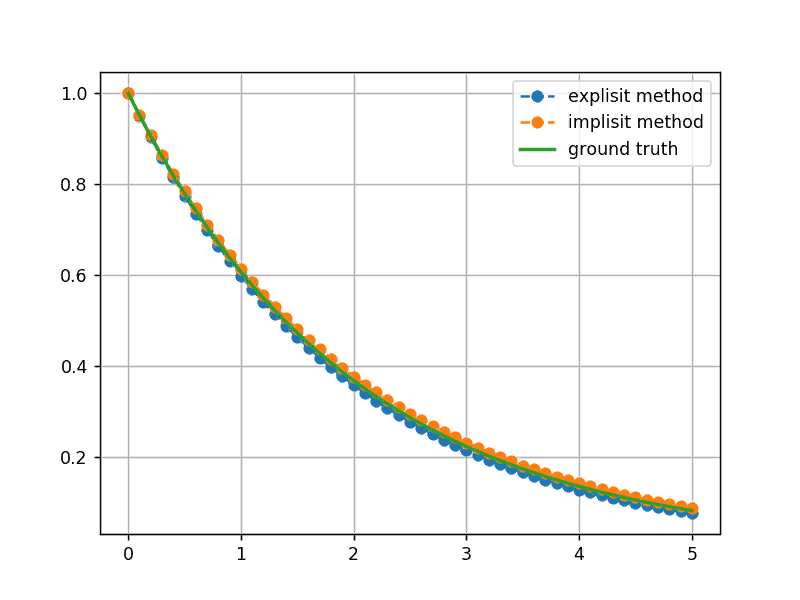

In [9]:
lam = -0.5

tt1, y1 = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt1, y1, 'o--', label='explisit method')

tt, y = imp_euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='implisit method')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')

plt.legend(loc='best')
plt.grid(True)

Пока решения не сильно отличаются. Посмотрим, как поведёт себя неявная схема с изменением $\tau$:

<IPython.core.display.Javascript object>


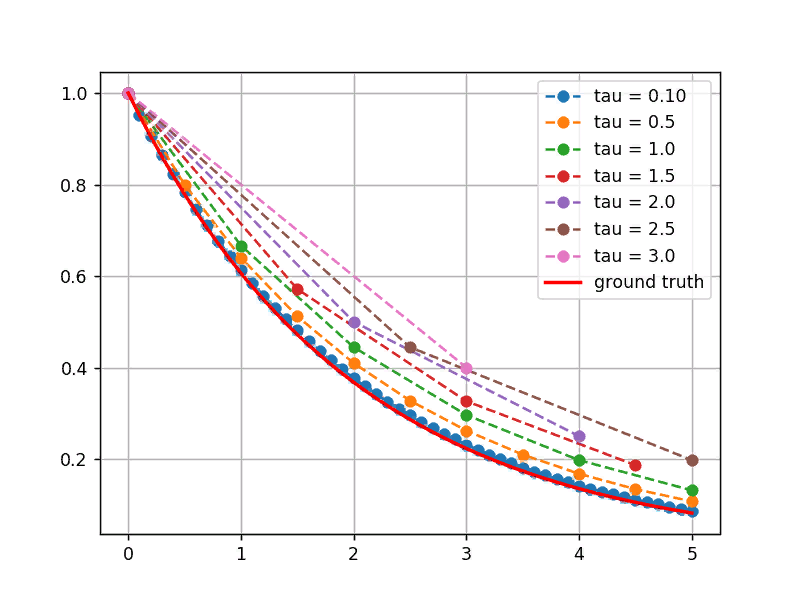

In [10]:
tt, y = imp_euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='tau = 0.10')

for tau in [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]:
    tt1, y1 = imp_euler_solve(lam, u0=1.0, T=5, dt=tau)
    plt.plot(tt1, y1, 'o--', label='tau = %1.1f'%tau)
    
plt.plot(tt, np.exp(lam*tt), 'r-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

Решение с помощью неявной схемы сохраняет монотонность при $\tau > 0$ при заданном параметре $\lambda$ (он должен быть меньше нуля). В этом смысле неявная схема не имеет ограничений на $\tau$ и, следовательно, является более устойчивой, чем явный метод. (Более того, является абсолютно устойчивой).

## II. Stiff systems.

Consider a system of two first order equations

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

where $\mathbf{u}$ is a two-dimensional vector, and $A$ is a known constant 2$\times$2 matrix.

Implement a generalization of `euler_solve` routine for solving a system of linear first-order equations with time-independent matrix $A$ using the explicit Euler's method.

In [12]:
def euler_solve_system(A, u0, T, dt):
    
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty([num_steps+1, 2])
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + A @ y[k] * dt
    return tt, y

### Test II.1

Take 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

and the initial condition $\mathbf{u} = (1, 0)^T$.

Solve the system using a fixed step size $\tau=0.01$. Is the explicit Euler's method stable at this value of the step size?

Find eigenvalues of $A$ (use `np.linalg.eigvals`) and comment whether the system is stiff.

(20% of the grade)

In [13]:
from scipy.linalg import expm

<IPython.core.display.Javascript object>


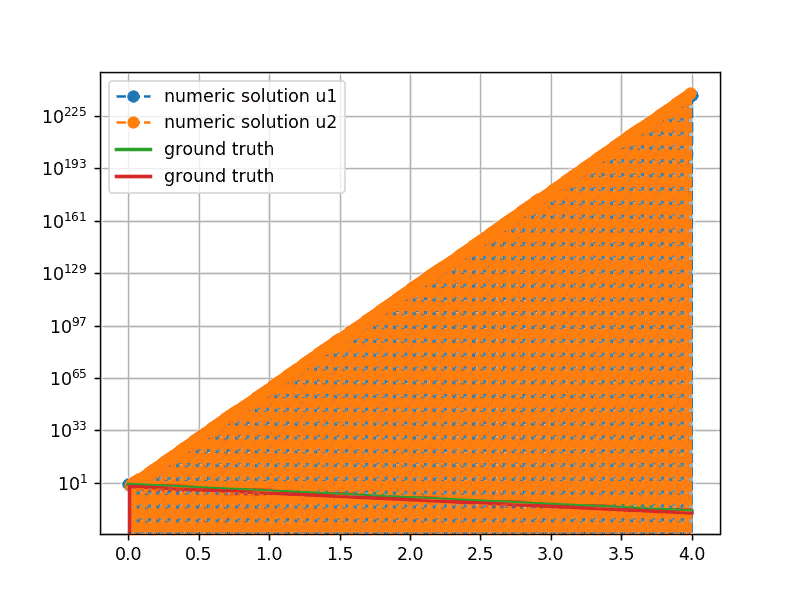

In [25]:
A = np.array([[-10, 10], [32, -499]])
u0 = (1, 0)
tt, y = euler_solve_system(A, u0, T=4, dt=0.01)
true_y = [expm(A*t) @ u0 for t in tt]

plt.plot(tt, y[:,0], 'o--', label='numeric solution u1')
plt.plot(tt, y[:,1], 'o--', label='numeric solution u2')
plt.plot(tt, true_y, '-', lw=2, label='ground truth')
plt.yscale('log')
plt.legend(loc='best')
plt.grid(True)

In [26]:
np.linalg.eigvals(A)

array([  -9.34647667, -499.65352333])

In [27]:
eig_val = abs(np.linalg.eigvals(A))
max(eig_val)/min(eig_val)

53.45902427704808

Система уравнений устойчива, так как $\frac{max_{k} |\lambda_{k}|}{min_{k} |\lambda_{k}|}\gg 1$.
Явный метод Эйлера неустойчив, так как $max_{k} |\lambda_{k}| \tau > 1$. Проверим при $\tau = \frac1{max_{k} |\lambda_{k}|}$:

<IPython.core.display.Javascript object>


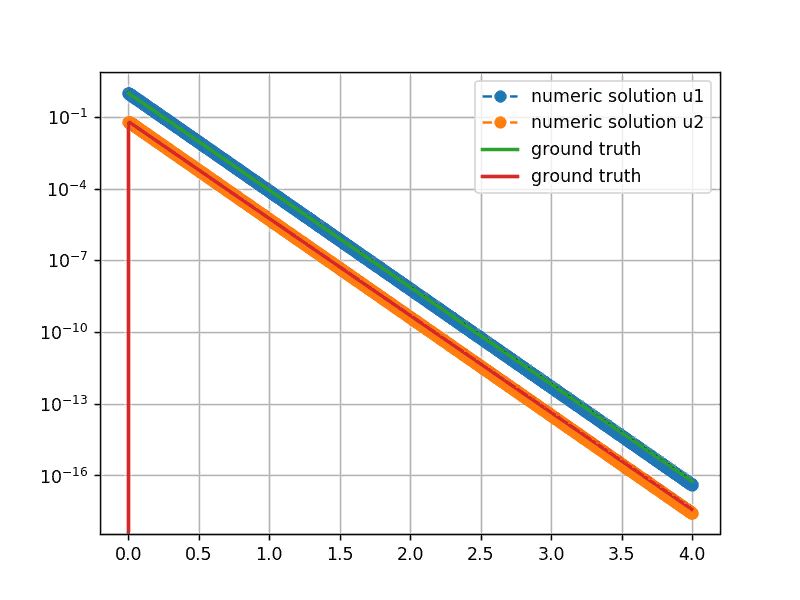

In [32]:
tt, y = euler_solve_system(A, u0, T=4, dt=1/max(eig_val))
true_y = [expm(A*t) @ u0 for t in tt]

plt.plot(tt, y[:,0], 'o--', label='numeric solution u1')
plt.plot(tt, y[:,1], 'o--', label='numeric solution u2')
plt.plot(tt, true_y, '-', lw=2, label='ground truth')
plt.yscale('log')
plt.legend(loc='best')
plt.grid(True)

При шаге $\tau \approx 0.002$ явная схема устойчива.

### Test II.2

Implement the $\textit{implicit}$ Euler's scheme for a system of first-order equations with constant coefficients. Note that at each time step you need to solve a system of linear algebraic equations, use `np.linalg.solve` for that.

Use this routine to solve the system from Test II.1 at the same step size $\tau=0.01$. Compare solutions obtained by an explicit and an implicit Euler's methods.

(20% of the grade)

In [36]:
def imp_euler_solve_system(A, u0, T, dt):
    
    n = A.shape[0]
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty([num_steps+1, 2])
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = np.linalg.solve(np.eye(n) - A*dt, y[k])
    return tt, y

<IPython.core.display.Javascript object>


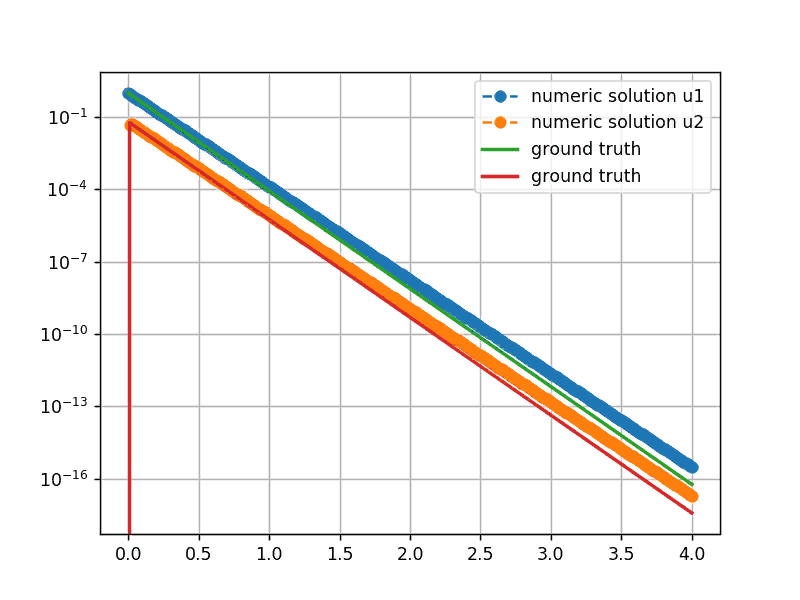

In [37]:
tt, y = imp_euler_solve_system(A, u0, T=4, dt=0.01)
true_y = [expm(A*t) @ u0 for t in tt]

plt.plot(tt, y[:,0], 'o--', label='numeric solution u1')
plt.plot(tt, y[:,1], 'o--', label='numeric solution u2')
plt.plot(tt, true_y, '-', lw=2, label='ground truth')
plt.yscale('log')
plt.legend(loc='best')
plt.grid(True)

Неявная схема устойчива для любого положительного шага, поэтотому и при $\tau=0.01$ решение хорошо сошлось, в отличие от явной схемы. Из всего вышесказанного можно сделать вывод, что для уствойчивых систем неявные методы работают лучше.

# III. Second order ODEs.

Consider a second order ODE, which describes a oscillating pendulum

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Convert this second order ODE into a system of two first order ODEs.

### Test III.1 

Solve this system of equations using the explicit Euler's method over a time interval which includes at least several periods. We know that the equation of motion conserves energy, so that

$$
E = \frac{u'^2}{2} + \frac{\omega^2 u^2}{2}
$$

should remain constant. Plot the dependence of $E$ on time for your numeric solution. Use several values of the time step. Does your discretized scheme conserve energy?

(20% of the grade)

$$ v = \dot u$$

$$ \frac d{dt}  
\begin{pmatrix}
    u\\
    v
  \end{pmatrix} = 
  \begin{pmatrix}
    v\\
    -\omega^2 u
  \end{pmatrix}$$

$$ \frac d{dt}  
\begin{pmatrix}
    u\\
    v
  \end{pmatrix} =
  \begin{pmatrix}
    0 & 1\\
    -\omega^2 & 0
  \end{pmatrix}
  \begin{pmatrix}
    u\\
    v
  \end{pmatrix}$$

In [62]:
w = 2*np.pi

A = np.zeros((2,2))
A[0, 1] = 1
A[1, 0] = - w**2

u0 = (0, 1)

<IPython.core.display.Javascript object>


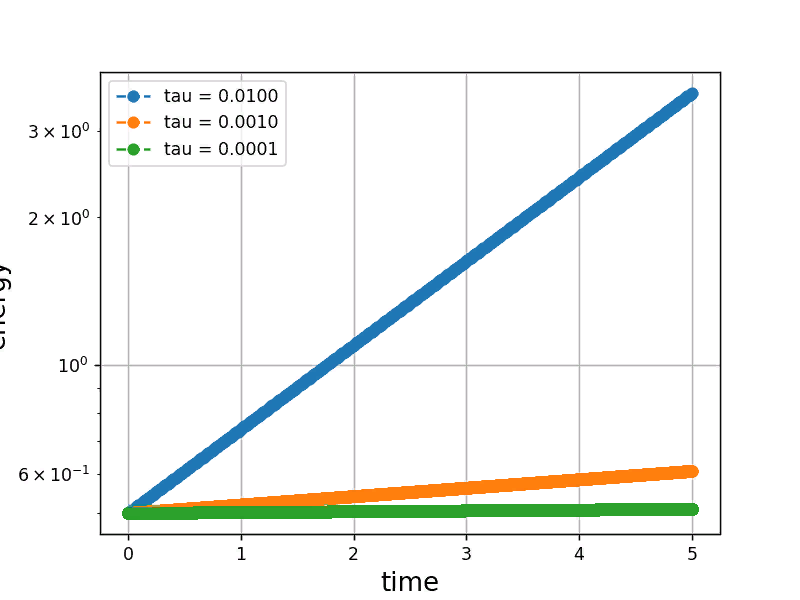

In [69]:
for tau in [0.01, 0.001, 0.0001]:
    
    tt, y = euler_solve_system(A, u0, T=5, dt=tau)
    E = y[:,0]**2 * w**2 /2 + y[:,1]**2 /2
    plt.plot(tt, E, 'o--', label='tau = %.4f'%tau)
    
plt.xlabel('time', fontsize=15)
plt.ylabel('energy', fontsize=15)
plt.yscale('log')
plt.legend(loc='best')
plt.grid(True)

Чем меньше шаг, тем больше график $E(t)$ похож на константный, но всё же такая схема не сохраняет энергию.

### Test III.2

Implement the 2nd order Runge-Kutta scheme. Use it to solve the same equation with same time steps. Compare solutions produced by the RK method and the Euler's method at the same values of the time step. Check conservation of energy. Discuss.

(20% of the grade)

In [64]:
def runge_kutta(A, u0, T, dt):
    
    n = A.shape[0]
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty([num_steps+1, 2])
    y[0] = u0
    
    for k in range(num_steps):
        y_half = y[k] + A @ y[k] * dt / 2
        y[k+1] = y[k] + A @ y_half * dt
        
    return tt, y

<IPython.core.display.Javascript object>


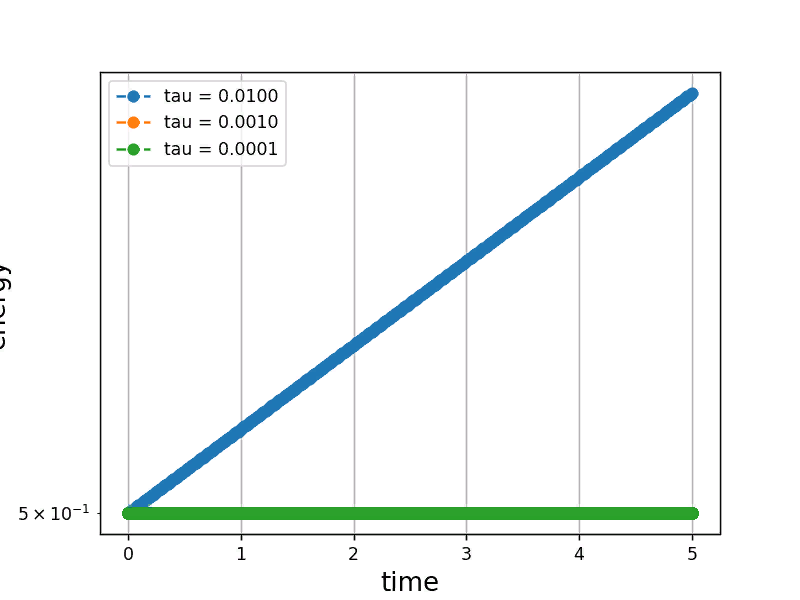

In [71]:
for tau in [0.01, 0.001, 0.0001]:
    
    tt, y = runge_kutta(A, u0, T=5, dt=tau)
    E = y[:,0]**2 * w**2 /2 + y[:,1]**2 /2
    plt.plot(tt, E, 'o--', label='tau = %.4f'%tau)
    
plt.xlabel('time', fontsize=15)
plt.ylabel('energy', fontsize=15)
plt.yscale('log')
plt.legend(loc='best')
plt.grid(True)

Решение методом Рунге-Кутта сошлось быстрее решения явным методом Эйлера и уже при $\tau = 0.001$ напоминает константное, значит, такая схема сохраняет энергию. 